In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# 1. Define column names
column_names = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment',
    'urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
    'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
    'is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
    'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
    'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
    'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','label'
]

# 2. Load the dataset directly from the internet
url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
df = pd.read_csv(url, names=column_names)

# 3. Encode categorical features
categorical_cols = ['protocol_type', 'service', 'flag']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# 4. Binary label conversion: normal vs attack
df['label'] = df['label'].apply(lambda x: 'normal' if x == 'normal.' else 'attack')
df['label'] = df['label'].map({'normal': 0, 'attack': 1})

# 5. Split features and labels
X = df.drop('label', axis=1)
y = df['label']

# 6. Normalize features
X = StandardScaler().fit_transform(X)

# 7. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 8. Train SVM
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_train, y_train)

# 9. Predict and evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

[[ 29151     41]
 [    77 118938]]
              precision    recall  f1-score   support

           0     0.9974    0.9986    0.9980     29192
           1     0.9997    0.9994    0.9995    119015

    accuracy                         0.9992    148207
   macro avg     0.9985    0.9990    0.9987    148207
weighted avg     0.9992    0.9992    0.9992    148207



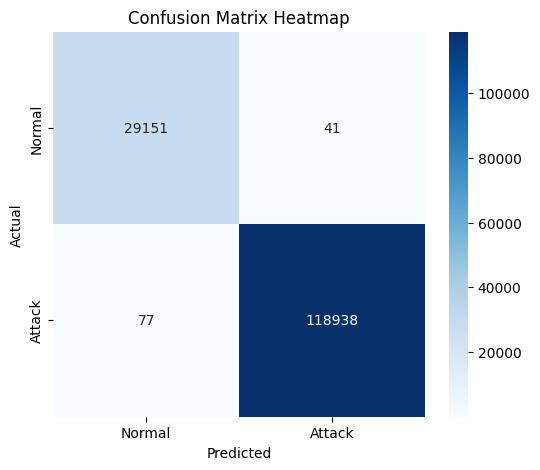

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


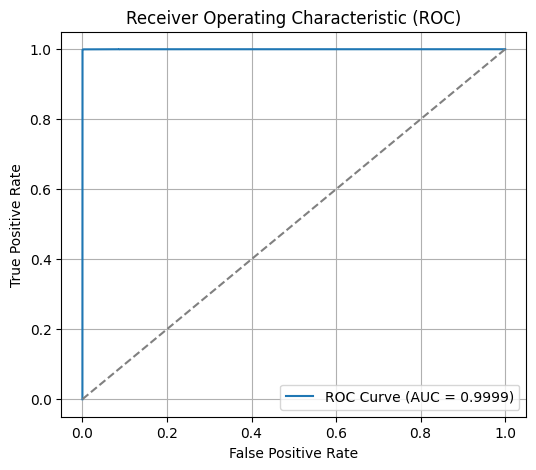

In [6]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get decision scores (higher = more likely to be class 1)
y_scores = model.decision_function(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.grid(True)
plt.show()
